$$ln(I) \approx ln(I_o) + \frac{e}{\eta KT}V_b$$

si consideramos la corriente en mA 
$$ln(I_{mA}) \approx  (13.8155 + ln(I_0)) +  \frac{e}{\eta KT}V_b$$

podemos ajustar la curba como: $$ln(I_{mA}) =  b_1 +  b_0V_b$$

donde b1 y b0, son los parametros a encontrar


La incertidumbre esta dada por
$$ \delta (ln(I)) = \frac{\delta I}{I}$$

$$ K : 1.380649\times 10^{-23}J.K^{-1}$$
$$ T : 299.6K$$

$$e : -1.6 \times 10^{-19} c$$

Entonces

$$ \frac{e}{KT} = 38.682$$

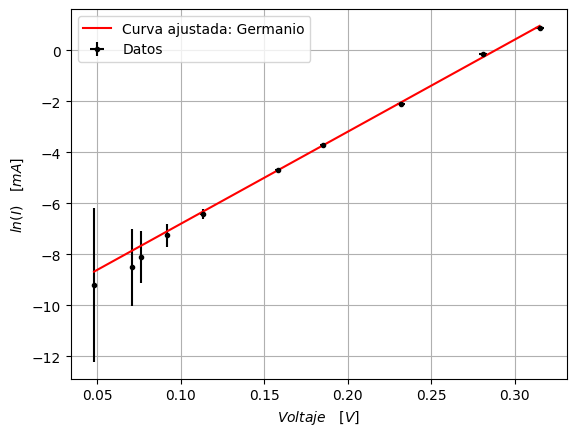

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData

#################EXTRACCION_DE_DATOS####################
ubc = "C:/Users/César/Downloads/FINAL PROJECT-LAB.INTERMEDIA.xlsx"
data = pd.ExcelFile(ubc)

# Leer la hoja deseada del archivo Excel
nombre_hoja = "Hoja1"  
datos_hoja = data.parse(nombre_hoja)

# Definir rango de columnas de 5-11
columnas_a_extraer = datos_hoja.columns[5:11]  # Columnas F a K

# Inicializar una lista para almacenar los arreglos NumPy
arreglos_numpy = []

# Recorrer cada columna del rango especificado
for columna in columnas_a_extraer:
    # Filtrar los datos numéricos de la columna actual
    datos_filtrados = datos_hoja.loc[datos_hoja[columna].notnull() & datos_hoja[columna].apply(np.isreal), columna]
    
    # Convertir los datos filtrados a un arreglo de NumPy y agregarlos a la lista
    arreglo_np = datos_filtrados.to_numpy()
    arreglos_numpy.append(arreglo_np)

########################DATOS###########################

V  = arreglos_numpy[0][:10].astype(float)
I  = arreglos_numpy[2][:10].astype(float)
dV = arreglos_numpy[3][:10].astype(float)
dI = arreglos_numpy[5][:10].astype(float)
#####################ODR################################
odr_data =  RealData(x = V , y = I , sx = dV, sy = dI)

def expect_odr(B,x):
    return B[0]*x + B[1]

odr_model = Model(expect_odr)
#ajuste ODR
odr_fit = ODR(odr_data, odr_model, beta0=[1,0])
out = odr_fit.run()

param3 = out.beta
incert3 = out.sd_beta
########################################################

# Generar puntos para la línea del modelo ajustado
x_linea = np.linspace(min(V), max(V), 100)  # Generar valores de x para la línea
y_linea = expect_odr(param3, x_linea)  # Calcular valores de y correspondientes al modelo

# Graficar datos con error bars
plt.errorbar(V, I, xerr=dV, yerr=dI, fmt="k.", label="Datos")

# Graficar la línea del modelo ajustado
plt.plot(x_linea, y_linea, 'r-', label="Curva ajustada: Germanio")



# ecuacion_latex_nuevos = r'$ln(I) \approx -10.412 + 36.073V_b$'  # La ecuación en LaTeX para los nuevos datos
# ecuacion_latex_errores1 = r'$\delta b_0 = \pm 0.465$'
# ecuacion_latex_errores2 = r'$\delta b_1 =  \pm 0.103$'
# plt.text(0.25, -6, ecuacion_latex_nuevos, fontsize=12, ha='center')
# plt.text(0.25, -8, ecuacion_latex_errores1, fontsize=12, ha='center')
# plt.text(0.25, -10, ecuacion_latex_errores2, fontsize=12, ha='center')

plt.xlabel(r"$Voltaje \quad [V]$")
plt.ylabel(r"$ln(I)  \quad [mA]$")
plt.legend()
plt.grid()
plt.show()



In [17]:
param3 

array([ 36.07305225, -10.41287185])

In [18]:
incert3

array([0.46479029, 0.10272369])

In [19]:
n1 = 38.682/36.07305225
n1

1.0723240088451345

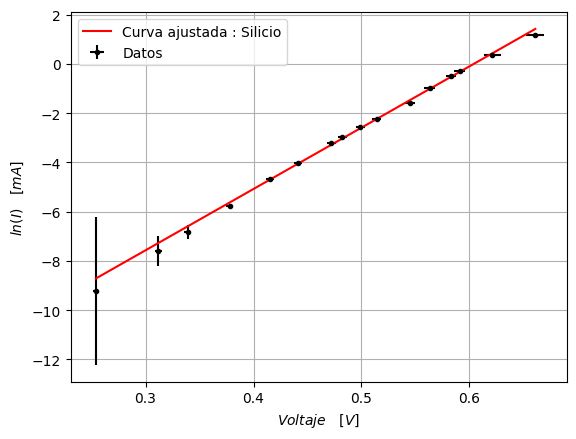

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData

#################EXTRACCION_DE_DATOS####################
ubc = "C:/Users/César/Downloads/FINAL PROJECT-LAB.INTERMEDIA.xlsx"
data = pd.ExcelFile(ubc)

# Leer la hoja deseada del archivo Excel
nombre_hoja = "Hoja2"  
datos_hoja = data.parse(nombre_hoja)

# Definir rango de columnas de 5-11
columnas_a_extraer = datos_hoja.columns[3:9]  # Columnas F a K

# Inicializar una lista para almacenar los arreglos NumPy
arreglos_numpy = []

# Recorrer cada columna del rango especificado
for columna in columnas_a_extraer:
    # Filtrar los datos numéricos de la columna actual
    datos_filtrados = datos_hoja.loc[datos_hoja[columna].notnull() & datos_hoja[columna].apply(np.isreal), columna]
    
    # Convertir los datos filtrados a un arreglo de NumPy y agregarlos a la lista
    arreglo_np = datos_filtrados.to_numpy()
    arreglos_numpy.append(arreglo_np)

########################DATOS###########################

V  = arreglos_numpy[0][:16].astype(float)
I  = arreglos_numpy[2][:16].astype(float)
dV = arreglos_numpy[3][:16].astype(float)
dI = arreglos_numpy[5][:16].astype(float)
#####################ODR################################
odr_data =  RealData(x = V , y = I , sx = dV, sy = dI)

def expect_odr(B,x):
    return B[0]*x + B[1]

odr_model = Model(expect_odr)
#ajuste ODR
odr_fit = ODR(odr_data, odr_model, beta0=[1,0])
out = odr_fit.run()

param3 = out.beta
incert3 = out.sd_beta
########################################################

# Generar puntos para la línea del modelo ajustado
x_linea = np.linspace(min(V), max(V), 100)  # Generar valores de x para la línea
y_linea = expect_odr(param3, x_linea)  # Calcular valores de y correspondientes al modelo

# Graficar datos con error bars
plt.errorbar(V, I, xerr=dV, yerr=dI, fmt="k.", label="Datos")

# Graficar la línea del modelo ajustado
plt.plot(x_linea, y_linea, 'r-', label="Curva ajustada : Silicio")

# ecuacion_latex_nuevos = r'$ln(I) \approx -15.033+ 24.886V_b$'  # La ecuación en LaTeX para los nuevos datos
# ecuacion_latex_errores1 = r'$\delta b_0 = \pm 0.314$'
# ecuacion_latex_errores2 = r'$\delta b_1 =  \pm 0.158$'
# plt.text(0.55, -6, ecuacion_latex_nuevos, fontsize=12, ha='center')
# plt.text(0.55, -8, ecuacion_latex_errores1, fontsize=12, ha='center')
# plt.text(0.55, -10, ecuacion_latex_errores2, fontsize=12, ha='center')


plt.xlabel(r"$Voltaje \quad [V]$")
plt.ylabel(r"$ln(I)  \quad [mA]$")
plt.grid()
plt.legend()
plt.show()


In [21]:
param3


array([ 24.88618322, -15.0332546 ])

In [22]:
incert3

array([0.31431945, 0.1584028 ])

In [23]:
n2 = 38.682/24.88618322
n2

1.5543564739535018

$$ln(I_0) \approx ln(C) - \frac{1}{\eta KT}E_g$$

$$\delta \left(\frac{1}{T} \right)= \frac{\delta T}{T^2}$$

$$ \delta (ln(I)) = \frac{\delta I}{I}$$

$$1J = 6.242 \times 10^{18} ev$$

Recordemos 

$$n_1 =  1.072$$
$$n_2 =  1.554$$

In [24]:
kinv = 1/(8.617333262*10**(-5))
kinv

11604.518121745583

$$1/k = 11604.518$$

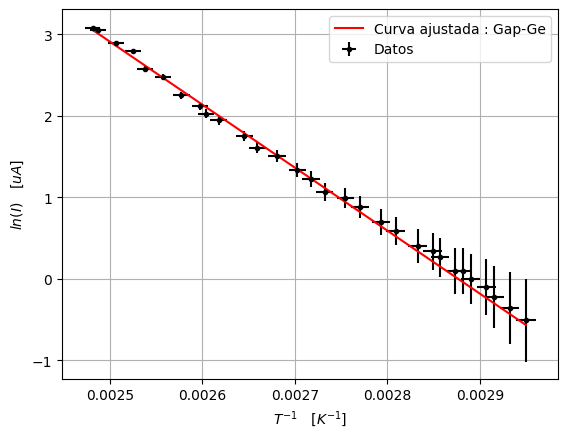

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData

#################EXTRACCION_DE_DATOS####################
ubc = "C:/Users/César/Downloads/AD803000.xlsx"
data = pd.ExcelFile(ubc)

# Leer la hoja deseada del archivo Excel
nombre_hoja = "Hoja1"  
datos_hoja = data.parse(nombre_hoja)

# Definir rango de columnas de 4-13
columnas_a_extraer = datos_hoja.columns[4:13]  

# Inicializar una lista para almacenar los arreglos NumPy
arreglos_numpy = []

# Recorrer cada columna del rango especificado
for columna in columnas_a_extraer:
    # Filtrar los datos numéricos de la columna actual
    datos_filtrados = datos_hoja.loc[datos_hoja[columna].notnull() & datos_hoja[columna].apply(np.isreal), columna]
    
    # Convertir los datos filtrados a un arreglo de NumPy y agregarlos a la lista
    arreglo_np = datos_filtrados.to_numpy()
    arreglos_numpy.append(arreglo_np)


########################DATOS###########################

T = arreglos_numpy[8][:30].astype(float)
I  = arreglos_numpy[3][:30].astype(float)
dT = arreglos_numpy[7][:30].astype(float)
dI = arreglos_numpy[6][:30].astype(float)
#####################ODR################################
odr_data =  RealData(x = T , y = I , sx = dT, sy = dI)

def expect_odr(B, x):
    return -B[0] * x + B[1]

odr_model = Model(expect_odr)
#ajuste ODR
odr_fit = ODR(odr_data, odr_model, beta0=[1,1])
out = odr_fit.run()

param3 = out.beta
incert3 = out.sd_beta
########################################################

# Generar puntos para la línea del modelo ajustado
x_linea = np.linspace(min(T), max(T), 100)  # Generar valores de x para la línea
y_linea = expect_odr(param3, x_linea)  # Calcular valores de y correspondientes al modelo

# Graficar datos con error bars
plt.errorbar(T, I, xerr=dT, yerr=dI, fmt="k.", label="Datos")



# ecuacion_latex_nuevos = r'$ln(I_) \approx  22.234 - 7729.342E_g$'  # La ecuación en LaTeX para los nuevos datos
# ecuacion_latex_errores1 = r'$\delta b_0 = \pm 94.169$'
# ecuacion_latex_errores2 = r'$\delta b_1 =  \pm 0.245$'
# plt.text(0.00262, 0.5, ecuacion_latex_nuevos, fontsize=12, ha='center')
# plt.text(0.0026, 0, ecuacion_latex_errores1, fontsize=12, ha='center')
# plt.text(0.0026,-0.5, ecuacion_latex_errores2, fontsize=12, ha='center')

# Graficar la línea del modelo ajustado
plt.plot(x_linea, y_linea, 'r-', label="Curva ajustada : Gap-Ge")

plt.xlabel(r"$T^{-1} \quad [K^{-1}]$")
plt.ylabel(r"$ln(I)  \quad [uA]$")
plt.grid()
plt.legend()
plt.show()

In [26]:
param3

array([7729.34188684,   22.23427898])

In [27]:
incert3 

array([94.16921829,  0.245047  ])

In [28]:
paso1 = 11604.518/n1

7729.34188684

$$\frac{1}{Kn_1}= 10821.839$$

In [29]:
Eg1= 10821.839/paso1
Eg1

0.999999981003659

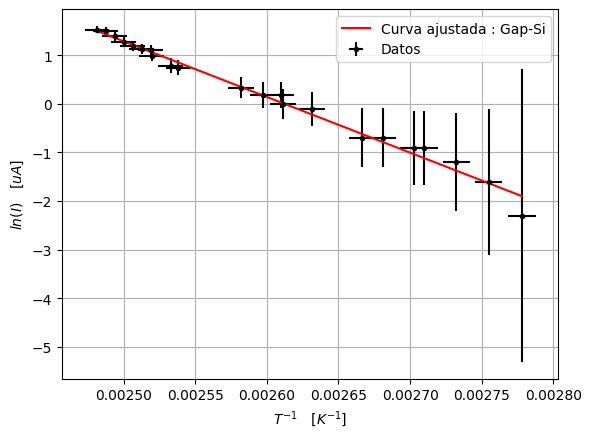

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.odr import ODR, Model, RealData

########################################################
temperaturas = np.array([383.2, 373, 369, 366, 363, 360, 387.3, 385, 383, 380, 375, 370, 403, 402, 401, 400, 399, 398, 397, 396.9, 394.8, 394])
x = np.array([1/w for w in temperaturas])
error1 = np.array([((0.3*(t-273)) / 100) + 1 for t in temperaturas])
x_err = np.array([tf / (i ** 2) for tf, i in zip(error1, temperaturas)])

corrientes_uA = np.array([1.2, 0.5, 0.4, 0.3, 0.2, 0.1, 1.4, 1.2, 1.0, 0.9, 0.5, 0.4, 4.6, 4.5, 4.0, 3.6, 3.3, 3.1, 3.0, 2.7, 2.2, 2.1])
y = np.array([np.log(p) for p in corrientes_uA])
error2 = np.array([(l / 100) + 0.3 for l in corrientes_uA])
y_err = np.array([g / s for s, g in zip(corrientes_uA, error2)])

#########################################################3

T = x
I  = y
dT = x_err
dI = y_err

#####################ODR################################
odr_data =  RealData(x = T , y = I , sx = dT, sy = dI)

def expect_odr(B, x):
    return -B[0] * x + B[1]

odr_model = Model(expect_odr)
#ajuste ODR
odr_fit = ODR(odr_data, odr_model, beta0=[1,1])
out = odr_fit.run()

param3 = out.beta
incert3 = out.sd_beta
########################################################

# Generar puntos para la línea del modelo ajustado
x_linea = np.linspace(min(T), max(T), 100)  # Generar valores de x para la línea
y_linea = expect_odr(param3, x_linea)  # Calcular valores de y correspondientes al modelo

# Graficar datos con error bars
plt.errorbar(T, I, xerr=dT, yerr=dI, fmt="k.", label="Datos")

# ecuacion_latex_nuevos = r'$ln(I) \approx  29.950 - 11464.568E_g$'  # La ecuación en LaTeX para los nuevos datos
# ecuacion_latex_errores1 = r'$\delta b_0 = \pm 322.627$'
# ecuacion_latex_errores2 = r'$\delta b_1 =  \pm  0.832$'
# plt.text(0.00258, -2, ecuacion_latex_nuevos, fontsize=12, ha='center')
# plt.text(0.00258, -3, ecuacion_latex_errores1, fontsize=12, ha='center')
# plt.text(0.00258,-4, ecuacion_latex_errores2, fontsize=12, ha='center')

# Graficar la línea del modelo ajustado
plt.plot(x_linea, y_linea, 'r-', label="Curva ajustada : Gap-Si")

plt.xlabel(r"$T^{-1} \quad [K^{-1}]$")
plt.ylabel(r"$ln(I)  \quad [uA]$")
plt.grid()
plt.legend()
plt.show()

In [31]:
param3

array([11464.56767137,    29.95014808])

In [32]:
incert3

array([322.62778276,   0.81264315])

In [33]:
paso2 = 11604.518/n2

In [34]:
Eg2 = 11464.567/paso2
Eg2

1.5356108661750256

GERMANIO_DELTAS

In [11]:
constprim= (1.6*(10000))/1.380
constprim

11594.202898550726

In [6]:
deltaTambiente = (299.6-273.0)*(0.3/100) +1
deltaTambiente

1.0798

In [7]:
deltaTP=((deltaTambiente/299.6) + (0.46479029/36.07305225))*10807.48645
deltaTP

178.2028526359458

In [12]:
deltaidealidadGe = 11594.202898550726*(deltaTP/(10807.48645**2))
deltaidealidadGe

0.017689116765052245

In [29]:
deltaG = ((94.16921829 /7729.34188684) + (deltaidealidadGe/1.0723240088451345))*(7729.34188684*1.0723240088451345)
deltaGapGe = deltaG*8.617333262*10**(-5)
deltaGapGe

0.0204838445100477

SILICIO_DELTAS

In [20]:
deltaTP2 =((deltaTambiente/299.6) + (0.31431945/24.88618322))*(299.6*24.88618322)
deltaTP2

121.04220786095601

In [21]:
deltaidealidadSi = 11594.202898550726*(deltaTP2/((299.6*24.88618322)**2))
deltaidealidadSi

0.025245125066789526

In [30]:
deltaSi = ((322.62778276/11464.56767) + (deltaidealidadSi/1.5543564739535018))*(11464.56767*1.5543)
deltaGapSi = deltaSi*8.617333262*10**(-5)
deltaGapSi

0.0681522734114015